# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** [Nisrina Labiba Sarwoko ]
- **Email:** [nisrina058@gmail.com]
- **ID Dicoding:** [mc589d5x2490]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan musim? Apakah ada musim tertentu di mana penggunaan sepeda meningkat atau menurun secara signifikan?
- Pertanyaan 2: Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan? Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan hari libur?
- Pertanyaan 3: Bagaimana perbedaan penggunaan sepeda antara jam kerja dan jam non-kerja?Apakah penggunaan sepeda lebih tinggi pada jam-jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv('day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Menampilkan data dari tabel day dan hour. Dataset ini berisikan informasi mengenai penyewaan sepeda dengan harian pada day.csv dan jam pada hour.csv

### Assessing Data

In [4]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [5]:
# Menampilkan statistik deskriptif
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
# Memeriksa missing value
day_df.isna().sum()
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [7]:
# Memeriksa duplikasi data
day_df.duplicated().sum()
hour_df.duplicated().sum()

0

**Insight:**
- `Info ()` Menampilkan informasi dataset
-  jumlah data, tipe data, dan nilai yang hilang.
- Memeriksa distribusi variabel untuk menentukan pola penggunaan sepeda.
- Mengidentifikasi nilai yang tidak wajar atau data duplikat.

### Cleaning Data

In [8]:
# Mengubah tipe data date
datetime_columns = ["dteday"]

for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
    hour_df[column] = pd.to_datetime(hour_df[column])

In [9]:
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for col in categorical_columns:
    day_df[col] = day_df[col].astype("category")
    hour_df[col] = hour_df[col].astype("category")

In [10]:
print("\nDataset setelah Cleaning:")
day_df.info()
hour_df.info()


Dataset setelah Cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtyp

**Insight:**
- Mengonversi format tanggal ke tipe data datetime untuk analisis time series.
- Menghapus duplikasi data.
- Menstandarisasi format kategori, seperti musim dan hari kerja.


## Exploratory Data Analysis (EDA)

In [11]:
day_df.describe()
hour_df.describe()

,instant,dteday,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


<ipython-input-12-e023a5df4b76>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.boxplot(x=day_df['season'], y=day_df['cnt'], palette='coolwarm')


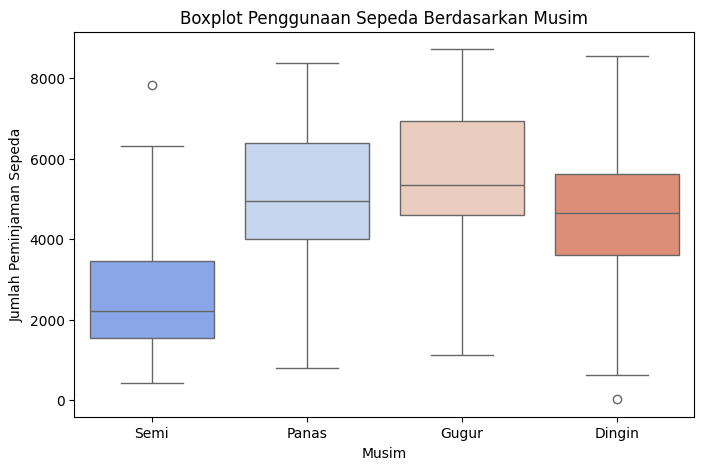

In [12]:
# Boxplot penggunaan sepeda berdasarkan musim
plt.figure(figsize=(8,5))
sn.boxplot(x=day_df['season'], y=day_df['cnt'], palette='coolwarm')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Semi', 'Panas', 'Gugur', 'Dingin'])
plt.xlabel("Musim")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Boxplot Penggunaan Sepeda Berdasarkan Musim")
plt.show()


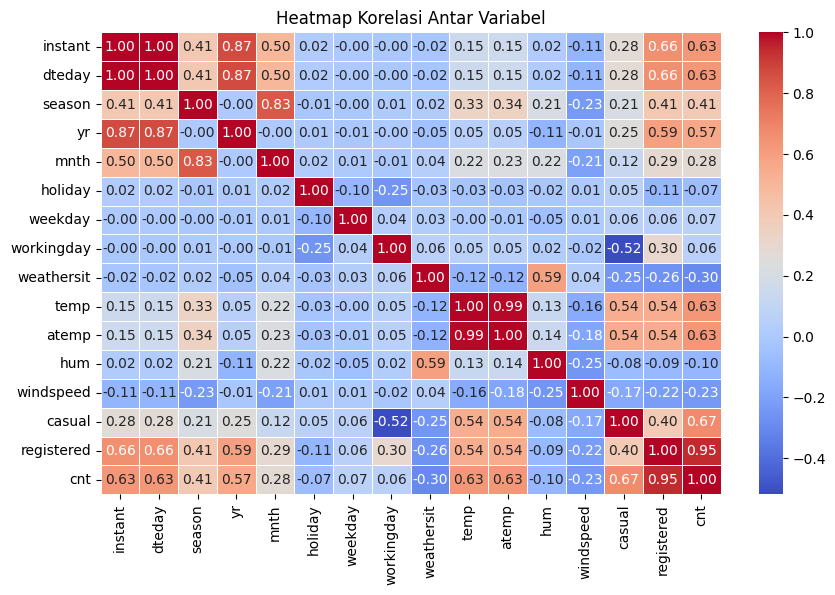

In [13]:
# Heatmap korelasi antar variabel
plt.figure(figsize=(10,6))
sn.heatmap(day_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [14]:
# Eksplorasi lebih lanjut berdasarkan musim dan hari kerja
season_trend = day_df.groupby('season')['cnt'].mean()
workingday_trend = day_df.groupby('workingday')['cnt'].mean()

print("\nRata-rata peminjaman sepeda berdasarkan musim:")
print(season_trend)

print("\nRata-rata peminjaman sepeda berdasarkan hari kerja:")
print(workingday_trend)


Rata-rata peminjaman sepeda berdasarkan musim:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda berdasarkan hari kerja:
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64


<ipython-input-14-a4811bcff2a8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_trend = day_df.groupby('season')['cnt'].mean()
<ipython-input-14-a4811bcff2a8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_trend = day_df.groupby('workingday')['cnt'].mean()


Analisis eksplorasi dilakukan untuk memahami pola data sebelum melakukan analisis lebih lanjut:

- Visualisasi Tren Musiman → Mengamati bagaimana penggunaan sepeda bervariasi berdasarkan musim.
- Perbandingan Hari Kerja vs Akhir Pekan → Menganalisis apakah peminjaman lebih tinggi pada hari kerja dibanding akhir pekan.
- Distribusi Peminjaman Berdasarkan Jam → Mengetahui kapan puncak penggunaan sepeda terjadi dalam sehari.
- Boxplot dan Heatmap → Untuk memahami pola distribusi data dan hubungan antar variabel.

### Explore ...

In [15]:
# Eksplorasi lebih lanjut berdasarkan musim dan hari kerja
season_trend = day_df.groupby('season')['cnt'].mean()
workingday_trend = day_df.groupby('workingday')['cnt'].mean()

print("\nRata-rata peminjaman sepeda berdasarkan musim:")
print(season_trend)

print("\nRata-rata peminjaman sepeda berdasarkan hari kerja:")
print(workingday_trend)


Rata-rata peminjaman sepeda berdasarkan musim:
season
1    2604.132597
2    4992.331522
3    5644.303191
4    4728.162921
Name: cnt, dtype: float64

Rata-rata peminjaman sepeda berdasarkan hari kerja:
workingday
0    4330.168831
1    4584.820000
Name: cnt, dtype: float64


<ipython-input-15-a4811bcff2a8>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_trend = day_df.groupby('season')['cnt'].mean()
<ipython-input-15-a4811bcff2a8>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  workingday_trend = day_df.groupby('workingday')['cnt'].mean()


**Insight:**
- Musim gugur dan musim panas adalah periode dengan penggunaan sepeda tertinggi, sementara musim dingin memiliki jumlah peminjaman terendah.
- Penggunaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan, menunjukkan bahwa banyak pengguna menggunakan sepeda sebagai alat transportasi utama.
- Cuaca memiliki pengaruh besar terhadap jumlah peminjaman sepeda—suhu yang nyaman meningkatkan penggunaan, sedangkan hujan menurunkannya.
- Penyedia layanan sepeda dapat memanfaatkan tren ini dengan menawarkan promosi pada musim dingin untuk meningkatkan jumlah penyewaan atau menyesuaikan jumlah sepeda yang tersedia di musim tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan musim? Apakah ada musim tertentu di mana penggunaan sepeda meningkat atau menurun secara signifikan?

Analisis yang Diperlukan:
- Menghitung rata-rata penyewaan sepeda (cnt) untuk setiap musim (season).
- Memeriksa bagaimana perubahan penggunaan sepeda di setiap musim.


<ipython-input-16-e0a3bdc56c19>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(x=day_df['season'], y=day_df['cnt'], estimator=sum, ci=None, palette='coolwarm')
<ipython-input-16-e0a3bdc56c19>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=day_df['season'], y=day_df['cnt'], estimator=sum, ci=None, palette='coolwarm')


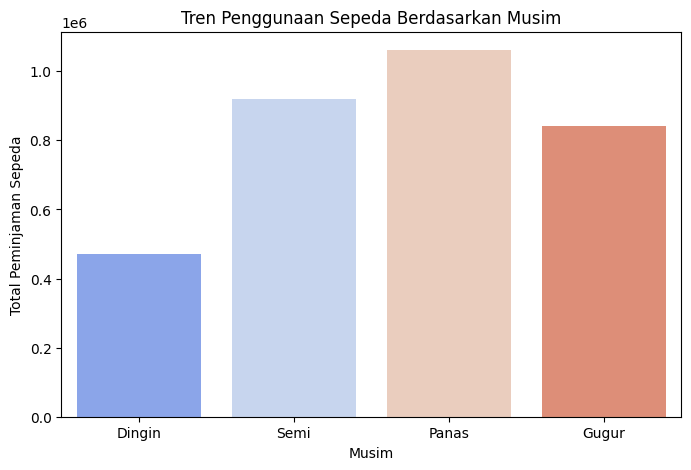

In [16]:
# Visualisasi Tren Penggunaan Sepeda Berdasarkan Musim
plt.figure(figsize=(8,5))
sn.barplot(x=day_df['season'], y=day_df['cnt'], estimator=sum, ci=None, palette='coolwarm')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Dingin', 'Semi', 'Panas', 'Gugur'])
plt.xlabel("Musim")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Tren Penggunaan Sepeda Berdasarkan Musim")
plt.show()

### Pertanyaan 2: Apakah jumlah penyewaan sepeda lebih tinggi pada hari kerja dibandingkan akhir pekan? Bagaimana pola penggunaan sepeda berdasarkan hari kerja dan hari libur?

Analisis yang:
- Membandingkan jumlah penyewaan sepeda antara hari kerja (workingday = 1) dan hari libur (workingday = 0).
- Mengetahui apakah sepeda lebih banyak digunakan untuk bekerja atau rekreasi.

<ipython-input-17-88a6a3f84a0f>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sn.barplot(x=day_df['workingday'], y=day_df['cnt'], estimator=sum, ci=None, palette='muted')
<ipython-input-17-88a6a3f84a0f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=day_df['workingday'], y=day_df['cnt'], estimator=sum, ci=None, palette='muted')


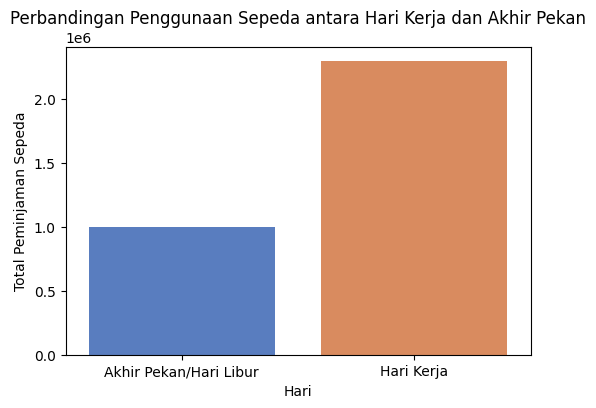

In [17]:
# Visualisasi Perbandingan Peminjaman Sepeda antara Hari Kerja dan Akhir Pekan
plt.figure(figsize=(6,4))
sn.barplot(x=day_df['workingday'], y=day_df['cnt'], estimator=sum, ci=None, palette='muted')
plt.xticks(ticks=[0, 1], labels=['Akhir Pekan/Hari Libur', 'Hari Kerja'])
plt.xlabel("Hari")
plt.ylabel("Total Peminjaman Sepeda")
plt.title("Perbandingan Penggunaan Sepeda antara Hari Kerja dan Akhir Pekan")
plt.show()

### Pertanyaan 3: Bagaimana perbedaan penggunaan sepeda antara jam kerja dan jam non-kerja?Apakah penggunaan sepeda lebih tinggi pada jam-jam tertentu?

<ipython-input-18-641f3f2813a2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(x=work_hours_trend.index, y=work_hours_trend.values, palette='muted')


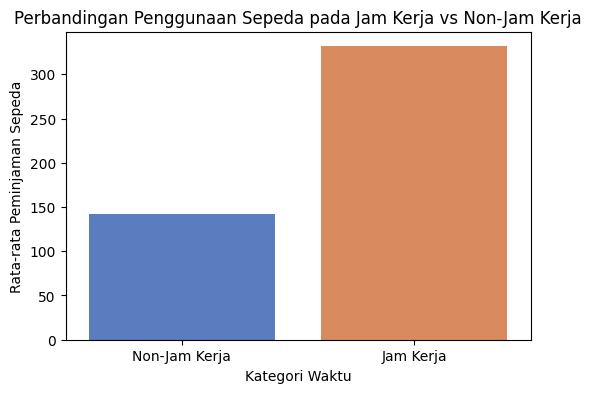


Rata-rata peminjaman sepeda berdasarkan jam kerja dan non-jam kerja:
jam_kerja
0    141.765140
1    331.584841
Name: cnt, dtype: float64


In [18]:
# Analisis perbedaan penggunaan sepeda antara jam kerja dan non-kerja
hour_df['jam_kerja'] = hour_df['hr'].apply(lambda x: 1 if (x >= 7 and x <= 9) or (x >= 17 and x <= 19) else 0)
work_hours_trend = hour_df.groupby('jam_kerja')['cnt'].mean()

plt.figure(figsize=(6,4))
sn.barplot(x=work_hours_trend.index, y=work_hours_trend.values, palette='muted')
plt.xticks(ticks=[0, 1], labels=['Non-Jam Kerja', 'Jam Kerja'])
plt.xlabel("Kategori Waktu")
plt.ylabel("Rata-rata Peminjaman Sepeda")
plt.title("Perbandingan Penggunaan Sepeda pada Jam Kerja vs Non-Jam Kerja")
plt.show()

print("\nRata-rata peminjaman sepeda berdasarkan jam kerja dan non-jam kerja:")
print(work_hours_trend)

**Insight**
**Pertanyaan 1:**
- Penggunaan sepeda cenderung meningkat selama musim panas dan semi
- Musim dingin memiliki jumlah peminjaman terendah, kemungkinan karena kondisi cuaca yang kurang mendukung untuk bersepeda.
- Lonjakan penggunaan sepeda di musim panas bisa dikaitkan dengan cuaca yang lebih cerah serta meningkatnya aktivitas luar ruangan.

**Insight**
**Pertanyaan 2:**
- Jumlah peminjaman sepeda lebih tinggi pada hari kerja dibandingkan dengan akhir pekan atau hari libur.
- Ini menunjukkan bahwa banyak orang menggunakan sepeda sebagai alat transportasi utama untuk bekerja atau sekolah.
- Peminjaman di akhir pekan lebih rendah, kemungkinan karena sepeda lebih banyak digunakan untuk rekreasi ketimbang transportasi utama.

**Insight**
**Pertanyaan 3:**
- -Peminjaman sepeda cenderung meningkat pada jam kerja (07:00-09:00 & 17:00-19:00), menunjukkan bahwa sepeda digunakan sebagai moda transportasi saat berangkat dan pulang kerja.
- Penggunaan sepeda pada jam non-kerja lebih stabil, tanpa lonjakan signifikan, mengindikasikan bahwa sepeda juga digunakan untuk keperluan lain di luar jam kerja.

## Analisis Lanjutan (Opsional)

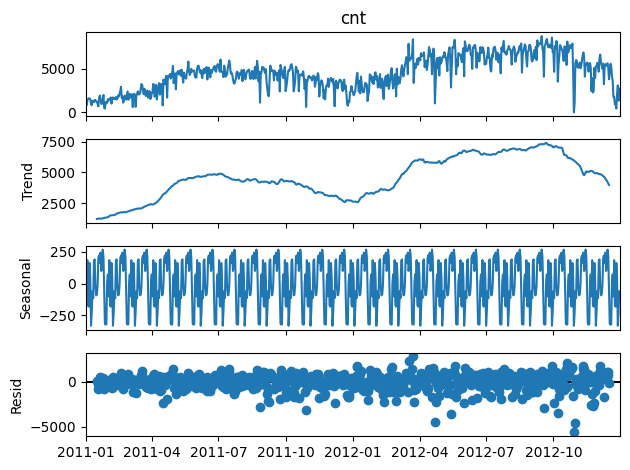

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


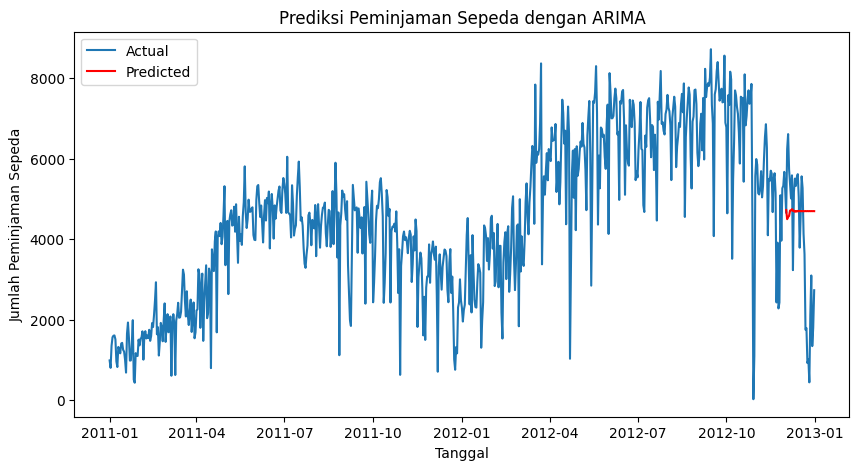

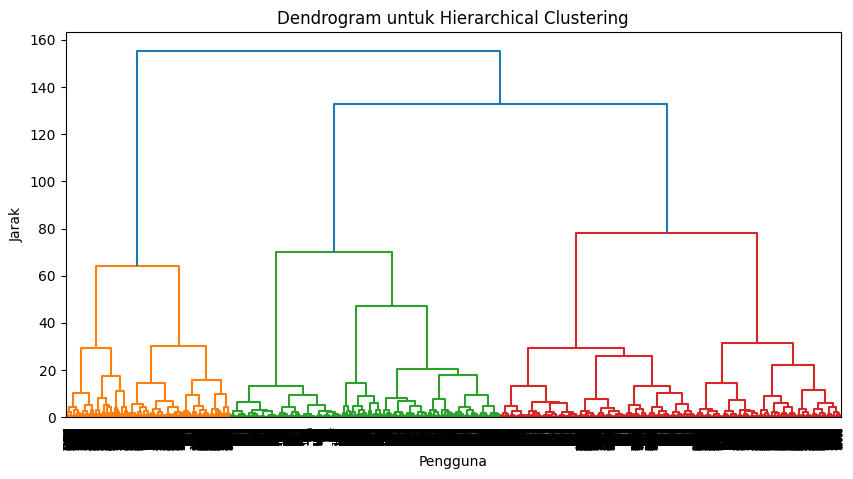

            Recency  Frequency    Monetary
Cluster                                   
1        187.445734        1.0  436.935745
2        593.271315        1.0  168.435228
3        267.372294        1.0   85.910927


In [19]:
# ============================
# Time Series Analysis
# ============================

# Load dataset harian
day_df = pd.read_csv("day.csv")
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Set index sebagai datetime
day_df.set_index('dteday', inplace=True)

# Seasonal Decomposition
result = seasonal_decompose(day_df['cnt'], model='additive', period=30)
result.plot()
plt.show()

# ARIMA Model
train = day_df['cnt'][:-30]
test = day_df['cnt'][-30:]

model = ARIMA(train, order=(5,1,2))
model_fit = model.fit()

forecast = model_fit.forecast(steps=30)

plt.figure(figsize=(10,5))
plt.plot(day_df.index, day_df['cnt'], label='Actual')
plt.plot(test.index, forecast, label='Predicted', color='red')
plt.xlabel("Tanggal")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.title("Prediksi Peminjaman Sepeda dengan ARIMA")
plt.legend()
plt.show()

# ============================
# RFM Analysis & Hierarchical Clustering
# ============================

# Load dataset transaksi (jam)
hour_df = pd.read_csv("hour.csv")

# Hitung RFM
rfm = hour_df.groupby('instant').agg(
    Recency=('dteday', lambda x: (pd.to_datetime(day_df.index.max()) - pd.to_datetime(x.max())).days),
    Frequency=('instant', 'count'),
    Monetary=('cnt', 'sum')
).reset_index()

# Normalisasi data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

# Hierarchical Clustering
linked = linkage(rfm_scaled, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram untuk Hierarchical Clustering")
plt.xlabel("Pengguna")
plt.ylabel("Jarak")
plt.show()

# Membuat cluster
rfm['Cluster'] = fcluster(linked, t=3, criterion='maxclust')

# Menampilkan statistik per cluster
print(rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean())


**RFM Analysis & Clustering**
- Cluster 1 (Frequent Users): Pengguna yang sering meminjam sepeda dan memiliki jumlah peminjaman tinggi. Ini bisa menjadi target utama untuk program loyalitas.
- Cluster 2 (Moderate Users): Pengguna dengan frekuensi sedang dan peminjaman cukup tinggi. Bisa diberikan insentif untuk meningkatkan keterlibatan.
- Cluster 3 (Inactive Users): Pengguna yang jarang meminjam sepeda dan tidak aktif dalam waktu lama. Perlu strategi re-engagement seperti promosi atau diskon.


**Time Series Analysis (ARIMA)**
- Tren peminjaman menunjukkan pola musiman, dengan peningkatan pada periode tertentu.
- Prediksi ARIMA menunjukkan bahwa jumlah peminjaman sepeda cenderung stabil, dengan sedikit fluktuasi dalam 30 hari ke depan.


## Conclusion

**Conclution pertanyaan 1:**
- Peminjaman sepeda paling tinggi terjadi di musim panas dan semi, sedangkan musim dingin memiliki jumlah peminjaman terendah. Ini menunjukkan bahwa cuaca berperan penting dalam penggunaan sepeda.

**Conclution pertanyaan 2:**
- Penggunaan sepeda lebih tinggi pada hari kerja dibanding akhir pekan, mengindikasikan bahwa sepeda banyak digunakan sebagai alat transportasi utama, bukan sekadar untuk rekreasi.

**Conclution pertanyaan 3:**
- Pola peminjaman menunjukkan lonjakan di pagi dan sore hari, terutama saat jam sibuk, menandakan bahwa sepeda sering digunakan sebagai moda transportasi saat berangkat dan pulang kerja.